In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from copy import deepcopy
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
data = []

with open("ARdata.txt", "r") as f:
    for line in f:
        data.append(float(line))
        
data = np.array(data[:])

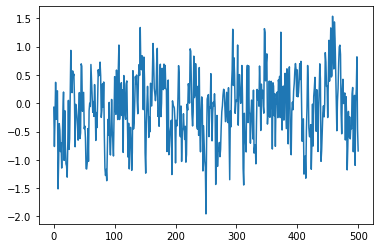

In [3]:
plt.plot(data)

# a

Find the orderpand fit the parameters: $\beta_i(i= 1,...,p)$, $\alpha_0$ using the linear regression method. In order to find $p$ and the best fit use the "AIC" and "BIC" criteria.

In [4]:
def dividing_data_into_subseries_II(data, k=2):
    X = []
    Y = []
    for i in range(len(data)-k):
        tmp = []
        for j in range(k):
            tmp.append(data[j+i])
        X.append(tmp)
        Y.append(data[k+i] )
    
    return np.array(X), np.array(Y)

###  Akaike information criterion (AIC)

$$  \mathrm {AIC} =  N \cdot \ln\left( \frac{\sum_{i=1}^N \epsilon^2}{N}\right) + 2k $$

where:
* $N = T-k$ - lenght of data series
* $k$ - number of parameters / $\beta_i$ ceofficients
* $\epsilon_i = (y_t-\hat{y_t})^2$


### Bayesian information criterion (BIC)

$$  \mathrm {BIC} =  N \cdot \ln\left( \frac{\sum_{i=1}^N \epsilon^2}{N}\right) + \ln(N)\cdot k $$

where:
* $N = T-k$ - lenght of data series
* $k$ - number of parameters / $\beta_i$ ceofficients
* $\epsilon_i = (y_t-\hat{y_t})^2$

In [5]:
alpha_tab = []
AIC_tab = []
BIC_tab = []

for k in range(1,10):
    X,Y = dividing_data_into_subseries_II(data, k=k)
    reg = LinearRegression(fit_intercept = False).fit(X, Y)
    prediction = reg.predict(X)
    N = len(X)
    
    alpha = np.sqrt(1/len(X)*sum((prediction - Y)**2))
    alpha_tab.append(alpha)
   
    AIC = N* np.log( sum( (Y-prediction)**2)/N) + 2*k
    AIC_tab.append(AIC)
    
    BIC = N*np.log(((Y-prediction)**2).mean()) + np.log(N)*k
    BIC_tab.append(BIC)
    
    print("k = {:}, alpha = {:}\t AIC = {:}\t BIC = {:}\n".format(k, alpha, AIC, BIC))

k = 1, alpha = 0.5098213793872195	 AIC = -671.6948511065393	 BIC = -667.4802430081169

k = 2, alpha = 0.5089534806801068	 AIC = -670.0478628437139	 BIC = -661.6226506522112

k = 3, alpha = 0.49730099043593373	 AIC = -689.7655823502289	 BIC = -677.133782119155

k = 4, alpha = 0.497358470939916	 AIC = -686.2535779182602	 BIC = -669.4192178138736

k = 5, alpha = 0.4975269543361798	 AIC = -682.5206999266912	 BIC = -661.4878202930672

k = 6, alpha = 0.4976581485857435	 AIC = -678.8634674312794	 BIC = -653.6361208558675

k = 7, alpha = 0.4980495877486443	 AIC = -674.6909655247008	 BIC = -645.273216904385

k = 8, alpha = 0.4932606726330802	 AIC = -680.8234519856328	 BIC = -647.2193785932913

k = 9, alpha = 0.49347956141858257	 AIC = -676.9734551469284	 BIC = -639.1871466984973



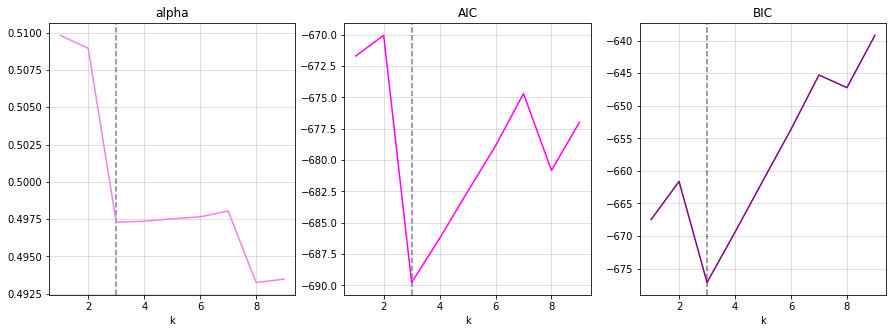

In [6]:
k_tab = list(range(1,10))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

for ax in axs:
    ax.set_xlabel('k')
    ax.grid(True, alpha = 0.5)
    ax.axvline(x=3, color = 'black', alpha = 0.5, ls = '--')
    
axs[0].set_title('alpha')
axs[1].set_title('AIC')
axs[2].set_title('BIC')
    
axs[0].plot(k_tab, alpha_tab, color = 'violet')
axs[1].plot(k_tab, AIC_tab, color = 'fuchsia')
axs[2].plot(k_tab, BIC_tab, color = 'purple')

### Best prediction: k=3

In [7]:
AIC_index= AIC_tab.index(min(AIC_tab))
BIC_index= BIC_tab.index(min(BIC_tab))

AIC_best = AIC_tab[AIC_index]
BIC_best = BIC_tab[BIC_index]

print("best AIC: k = {:}\t AIC = {:}".format(AIC_index+1, AIC_best))
print("best BIC: k = {:}\t BIC = {:}".format(BIC_index+1, BIC_best))

best AIC: k = 3	 AIC = -689.7655823502289
best BIC: k = 3	 BIC = -677.133782119155


In [8]:
k=3

X,Y = dividing_data_into_subseries_II(data, k=k)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
prediction = reg.predict(X)
N = len(X)

alpha = np.sqrt(((prediction - Y)**2).mean())
AIC = N*np.log(((Y-prediction)**2).mean()) + 2*k   
BIC = N*np.log(((Y-prediction)**2).mean()) + np.log(N)*k   
print("k = {:}, alpha = {:}\t AIC = {:}\t BIC = {:}\n".format(k, alpha, AIC, BIC))
print("model parameters: intercept: {:} coefficients: {:}".format(reg.intercept_, reg.coef_))

k = 3, alpha = 0.49730099043593373	 AIC = -689.7655823502289	 BIC = -677.133782119155

model parameters: intercept: 0.0 coefficients: [ 0.21790417 -0.0712842   0.48597427]


# b)

Compute  the  sample autocorrelation function (SACF, $\rho(t)$ and the sample partial autocorrelation function (SPACF,$\phi(t)$) and plot them for $t= 1,...10$. Based on the plot of SPACF check the orderp (on the plot include Gaussian N(0,(T−t)−1) bands for $95\%$ confidence level to check when SPACF becomes statistically zero).

In [9]:
def dividing_data_into_subseries(data, k=2):
    data_k = []
    for i in range(len(data)-k):
        tmp = [ ]
        for j in range(k):
            tmp.append(data[j+i])
        tmp.append(data[k+i])
        data_k.append(tmp)
    
    return np.array(data_k).T

In [10]:
def get_autocorrelation_coeff(data, delta):
    
    data_k = dividing_data_into_subseries(data, k=delta)  
    denominator = (data**2).mean()
    nominator = (data_k[0]*data_k[-1]).mean()
    
    return nominator/denominator
    

In [11]:
def get_autocorrelation(p,data):
    
    autocorrelation_tab = []

    for delta in range(1,p+1):
        autocorrelation = get_autocorrelation_coeff(data, delta)
        autocorrelation_tab.append(autocorrelation)
    
    return autocorrelation_tab

### sample autocorrelation function (SACF)

Δt = 1	 ρ(Δt)=0.512124
Δt = 2	 ρ(Δt)=0.288868
Δt = 3	 ρ(Δt)=0.323168
Δt = 4	 ρ(Δt)=0.255728
Δt = 5	 ρ(Δt)=0.153287
Δt = 6	 ρ(Δt)=0.124052
Δt = 7	 ρ(Δt)=0.092280
Δt = 8	 ρ(Δt)=0.083226
Δt = 9	 ρ(Δt)=0.079486
Δt = 10	 ρ(Δt)=0.091703


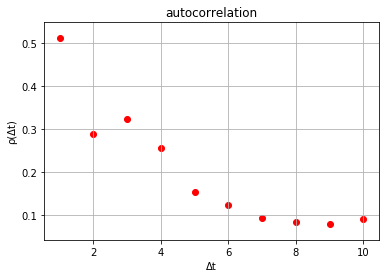

In [12]:
p=10
p_tab = list(range(1,p+1))
autocorrelation_tab = get_autocorrelation(p,data)

for delta_t, corr in zip(p_tab, autocorrelation_tab):
    print(u'\u0394t = {:}\t \u03C1(\u0394t)={:2f}'.format(delta_t,corr ))

plt.title('autocorrelation')
plt.scatter(p_tab, autocorrelation_tab, color ='red')  
plt.ylabel(u'\u03C1(\u0394t)')
plt.xlabel(u'\u0394t')
plt.grid()

###  Partial autocorrelation function (PACF)

In [13]:
def get_partial_autocorrelation(p, data):
    
    autocorrelation_tab = get_autocorrelation(p,data)
    
    M = np.identity(p)*0.5
    for i in range(p):
        for j in range(i+1, p):
            M[i][j] = autocorrelation_tab[j-i-1]
    
    A = np.matrix(M.T + M)
    A_inv = np.linalg.inv(A) 
    
    psi_vec = np.array(np.dot(A_inv,autocorrelation_tab))[0]
    
    return psi_vec[-1]

Δt = 1	 Φ(Δt)=0.512124
Δt = 2	 Φ(Δt)=0.036053
Δt = 3	 Φ(Δt)=0.220016
Δt = 4	 Φ(Δt)=0.010044
Δt = 5	 Φ(Δt)=-0.020596
Δt = 6	 Φ(Δt)=0.004085
Δt = 7	 Φ(Δt)=-0.019884
Δt = 8	 Φ(Δt)=0.031417
Δt = 9	 Φ(Δt)=0.017215
Δt = 10	 Φ(Δt)=0.047557


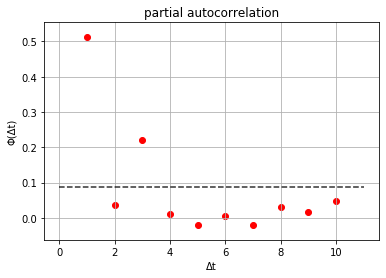

In [14]:
p=10
p_tab = list(range(1,p+1))
partial_corr_tab_tab = []

for k in range(1,p+1):
    partial_corr_tab_tab.append(get_partial_autocorrelation(k,data))


for delta_t, p_corr in zip(p_tab, partial_corr_tab_tab):
    print(u'\u0394t = {:}\t \u03A6(\u0394t)={:2f}'.format(delta_t, p_corr ))

N = 490
confidence_level = 1.96/np.sqrt(N)
N= 500
confidence_level_II = 1.96/np.sqrt(N)

    
plt.title('partial autocorrelation')
plt.scatter(p_tab, partial_corr_tab_tab, color ='red')  
plt.ylabel(u'\u03A6(\u0394t)')
plt.xlabel(u'\u0394t')
plt.hlines(y = confidence_level, xmin=0, xmax = p+1, linestyles='dashed', color = 'black', alpha = 0.5)
plt.hlines(y = confidence_level_II, xmin=0, xmax = p+1, linestyles='dashed', color = 'black', alpha = 0.5)

plt.grid()

Based on the above plot, with confidence level 95%, we may determinate k = 3. The corellation at Δt = 2 is quite small, but the result agrees with the results obtained in a).



# c)
###  Autocorrelation matrix  and  Yule Walker Equations


For the order $p$ established in (b) fit the parameters: $\beta_i (i=1,...,p)$ and $\alpha_0$ using the Yule-Walkermethod (in the matrix form).

In [15]:
k=3
autocorrelation_tab = get_autocorrelation(3,data)

M = np.identity(k)*0.5
for i in range(k):
    for j in range(i+1, k):
        M[i][j] = autocorrelation_tab[j-i-1]
        
A = np.matrix(M.T + M)
A_inv = np.linalg.inv(A) 
beta_vec = np.array(np.dot(A_inv, autocorrelation_tab))[0]
beta_vec ## beta1, beta2, beta3

array([ 0.48572791, -0.07255982,  0.22001576])

$$\hat{\alpha_0}^2 = (1- \rho^T \hat{A}^{-1}\rho)\cdot \frac{1}{T}\sum_{t=1}^{T}y_t^2 $$

In [16]:
alpha_0 = np.sqrt(float((1-np.dot( np.dot(A_inv, autocorrelation_tab), autocorrelation_tab))*(data**2).mean()))
alpha_0

0.4965234301264099

# d) 

Using the data and the fit of point  (a)  and/or  (c)  compute  the empirical noise 

$$ \hat{\eta}(t) = \frac{y_t - \hat{y_t}}{\alpha_0}$$ and check  if  it  has  standard  Gaussian N(0,1)  distribution  (use  e.g.Kolmogorov-Smirnov test).

In [17]:
## Based on results in a:
coeff_a = np.array([0.48597427, -0.0712842,  0.21790417])   ### beta1, beta2, beta3  (yt = b1y_{t-1}+b2 y_{t-2})
alpha_0a = 0.4973009904359337

## Based on results in c:
coeff_c = np.array([ 0.48572791, -0.07255982,  0.22001576])
alpha_0c = 0.4965234301264099

In [19]:
df= pd.DataFrame(dividing_data_into_subseries(data, k=3).transpose(), columns=['t3','t2','t1','t0'])
df

,t3,t2,t1,t0
0,-0.071753,-0.764857,-0.255960,0.369323
1,-0.764857,-0.255960,0.369323,-0.282561
2,-0.255960,0.369323,-0.282561,0.191984
3,0.369323,-0.282561,0.191984,0.218465
4,-0.282561,0.191984,0.218465,-1.514103
...,...,...,...,...
493,-0.403822,0.138601,-1.097626,0.037099
494,0.138601,-1.097626,0.037099,0.251938
495,-1.097626,0.037099,0.251938,0.819219
496,0.037099,0.251938,0.819219,-0.459295


### empirical noise

In [20]:
df['prediction_a'] = coeff_a[0]*df['t1'] + coeff_a[1]*df['t2'] + coeff_a[2]*df['t3']
df['empirical_noise_a'] = (df['t0'] - df['prediction_a'])/alpha_0a
df['empirical_noise_a'].std()

0.9991480116101611

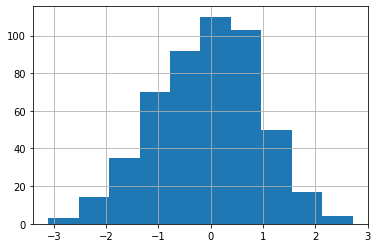

In [21]:
df['empirical_noise_a'].hist()

In [22]:
df['prediction_c'] = coeff_c[0]*df['t1'] + coeff_c[1]*df['t2'] + coeff_c[2]*df['t3']
df['empirical_noise_c'] = (df['t0'] - df['prediction_c'])/alpha_0c
df['empirical_noise_c'].std()

1.0007214617860256

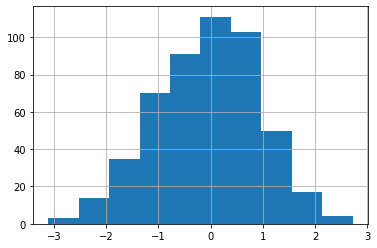

In [23]:
df['empirical_noise_c'].hist()

In [24]:
from scipy.stats import norm, kstest

D_N, p_value = kstest(df['empirical_noise_a'], 'norm', args=(0,1))

print("data a: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data a: test statistic: D_N = 0.04233859571377366,  p-value = 0.32615307818129174


In [25]:
from scipy.stats import norm, kstest

D_N, p_value = kstest(df['empirical_noise_c'], 'norm', args=(0,1))

print("data a: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data a: test statistic: D_N = 0.042597049599568976,  p-value = 0.3190418745285941


# e) 

Using the fit of point (a) and/or (c) simulate $N=100$  future(forecast) paths for $t=T+1,T+2,...,T+10$. Using the generated forecast paths estimate  the  mean  value $<y(t)>$ and the standard deviation $\sigma(y(t))$ of $y(t)$ for each future $t=T+ 1,T+ 2,T+ 10$ and plot them as the continuation of the sample data series (plot of mean with error bars of standard deviation).

In [26]:
def data_generator(beta1, beta2,beta3, alpha_0, past_data, T=10):
        
    for i in range(len(past_data), T + len(past_data)):
        noise = np.random.normal(0,1)
        new = alpha_0*noise + beta1*past_data[i-1] + beta2*past_data[i-2] + beta3*past_data[i-3]      
        past_data= np.append(past_data,new)

    return past_data

In [27]:
beta1, beta2, beta3 = [0.48597427, -0.0712842,  0.21790417] 
alpha_0 = 0.4973009904359337

past_data = data[-3:]
n = 100
data_gen = []

for i in range(n):
    data_gen.append(data_generator(beta1, beta2,beta3, alpha_0, past_data))

In [28]:
cols=['t-2', 't-1', 't', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10']

df_gen = pd.DataFrame(data_gen, columns = cols)
df_gen

,t-2,t-1,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10
0,0.819219,-0.459295,-0.843288,-0.060625,0.105148,-0.662794,-0.387318,-0.568420,-1.157877,0.109984,0.600537,0.095665,-0.001014
1,0.819219,-0.459295,-0.843288,-0.262801,-0.967477,-0.874832,-0.712690,-0.249705,-0.337580,0.081310,0.779183,0.747044,-0.288359
2,0.819219,-0.459295,-0.843288,-0.882172,-0.596419,-0.563360,0.091957,-0.099533,0.193557,0.190802,-1.130053,0.047709,-0.560807
3,0.819219,-0.459295,-0.843288,-0.579876,-0.810633,-1.226854,-0.115794,0.047137,-0.774542,-0.480248,-0.018579,-0.947523,-0.317453
4,0.819219,-0.459295,-0.843288,-0.016041,-0.352885,-0.140407,0.100392,-0.632398,-0.443456,-0.293422,-0.920294,-0.515898,-0.697755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.819219,-0.459295,-0.843288,-0.173847,0.138743,-0.385575,0.125745,-0.496466,0.022482,0.751976,0.771136,0.286693,0.416364
96,0.819219,-0.459295,-0.843288,-0.489809,0.029353,-0.136810,0.715988,0.031524,-0.136141,-0.142362,-0.051534,-0.146534,-0.076450
97,0.819219,-0.459295,-0.843288,0.041769,-0.593263,-0.424910,-0.878341,-0.256225,-0.220284,-0.488863,-1.004768,0.174981,-0.055846
98,0.819219,-0.459295,-0.843288,-0.334659,-0.322477,-0.195775,-0.488055,-0.296405,-0.873059,-0.496270,-1.256553,-0.211743,0.087114


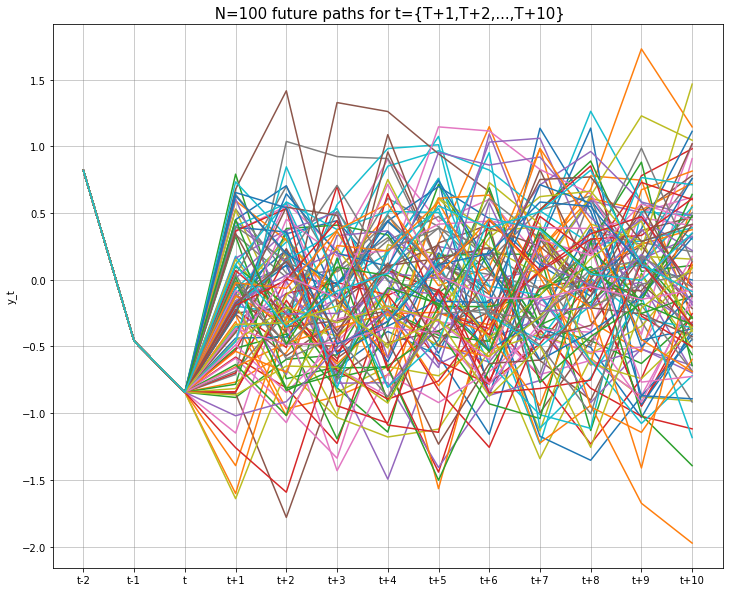

In [29]:
fig, ax = plt.subplots(figsize = (12,10))

ax.set_ylabel('y_t')
ax.set_title(' N=100 future paths for t={T+1,T+2,...,T+10}', fontsize = 15)
ax.grid(color = 'gray', alpha = 0.5)

for i in range(n):
    ax.plot(df_gen.loc[i])


In [30]:
df_gen.mean()

t-2     0.819219
t-1    -0.459295
t      -0.843288
t+1    -0.195539
t+2    -0.148382
t+3    -0.233988
t+4    -0.102112
t+5    -0.069278
t+6    -0.094131
t+7    -0.072410
t+8    -0.031420
t+9    -0.048089
t+10    0.001615
dtype: float64

In [31]:
df_gen.std()

t-2     3.347448e-16
t-1     5.579081e-16
t       1.115816e-16
t+1     5.134343e-01
t+2     5.445324e-01
t+3     5.126143e-01
t+4     5.630168e-01
t+5     5.824539e-01
t+6     5.441672e-01
t+7     5.712315e-01
t+8     5.707339e-01
t+9     5.977442e-01
t+10    6.103980e-01
dtype: float64